In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0,0.0,0,0,0.0,0,0.0,2.0,0.0
1,1,1,2,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0,0.0,0,0,2.0,2,2.0,0.0,7.0
2,2,2,1,0.0,0.0,0.0,NaN,0.0,2.0,0.0,...,0.0,0,0.0,2,0,NaN,3,2.0,0.0,7.0
3,2,2,2,1.0,0.0,0.0,2.0,0.0,NaN,2.0,...,0.0,0,0.0,2,0,2.0,2,2.0,0.0,7.0
4,2,2,1,0.0,0.0,0.0,NaN,0.0,2.0,0.0,...,0.0,0,0.0,3,0,2.0,2,NaN,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,3,0,0.0,0,3.0,0.0,70.0
354,2,3,2,0.0,0.0,NaN,0.0,0.0,3.0,2.0,...,0.0,0,0.0,0,0,0.0,0,1.0,0.0,70.0
355,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,2,0,0.0,0,2.0,NaN,70.0
356,2,1,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0,NaN,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
float64		column 4	37
float64		column 5	36
float64		column 6	19
float64		column 7	54
float64		column 8	19
float64		column 9	19
float64		column 10	18
int64		column 11	0
int64		column 12	0
float64		column 13	19
float64		column 14	37
float64		column 15	18
int64		column 16	0
float64		column 17	18
float64		column 18	36
float64		column 19	37
float64		column 20	36
float64		column 21	19
int64		column 22	0
float64		column 23	36
int64		column 24	0
float64		column 25	18
int64		column 26	0
float64		column 27	18
int64		column 28	0
int64		column 29	0
float64		column 30	18
int64		column 31	0
float64		column 32	36
float64		column 33	18
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,321.000000,322.000000,339.000000,304.000000,339.000000,339.000000,340.000000,...,340.000000,358.000000,340.000000,358.000000,358.000000,340.000000,358.000000,322.000000,340.000000,340.000000
mean,2.078212,1.807263,1.569832,1.355140,0.618012,0.463127,0.151316,0.342183,0.607670,0.532353,...,0.364706,0.474860,0.455882,0.949721,0.458101,0.097059,0.117318,1.869565,0.544118,36.544118
std,0.664865,0.701541,0.900909,1.114554,0.889565,0.970404,0.529772,0.807338,0.983323,0.916329,...,0.817898,0.871705,0.962939,1.129060,0.959796,0.433811,0.493863,0.670987,1.097514,15.223249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.500000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

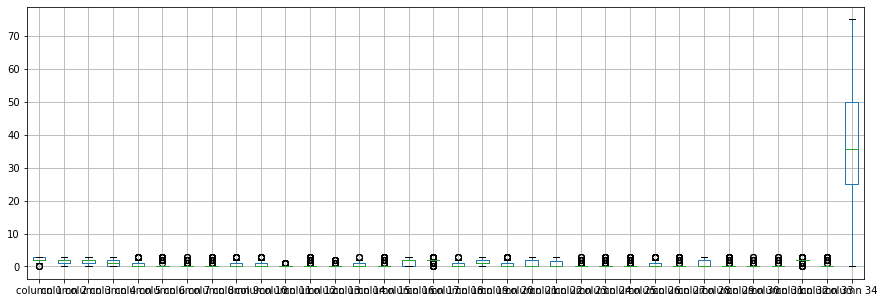

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.355140
column 5      0.618012
column 6      0.463127
column 7      0.151316
column 8      0.342183
column 9      0.607670
column 10     0.532353
column 11     0.122905
column 12     0.410615
column 13     0.138643
column 14     0.538941
column 15     0.302941
column 16     1.368715
column 17     1.950000
column 18     0.496894
column 19     1.314642
column 20     0.633540
column 21     0.964602
column 22     0.642458
column 23     0.276398
column 24     0.368715
column 25     0.364706
column 26     0.474860
column 27     0.455882
column 28     0.949721
column 29     0.458101
column 30     0.097059
column 31     0.117318
column 32     1.869565
column 33     0.544118
column 34    36.544118
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.017341,-0.001123,0.034063,-0.141366,-0.035918,0.131048,0.193670,...,0.003839,0.153229,-0.010603,0.038837,-0.012408,0.002851,0.006100,0.067963,-0.012914,0.005745
column 2,0.428769,1.000000,0.347106,-0.037859,-0.004783,-0.090262,-0.099948,-0.101179,0.289975,0.303501,...,-0.082302,0.205046,-0.136523,0.023095,-0.118109,-0.013507,-0.015402,-0.049060,-0.144307,0.013716
column 3,0.248062,0.347106,1.000000,-0.054529,0.246041,0.311914,-0.192179,0.254787,0.308094,0.266179,...,0.313652,0.350007,0.280202,-0.252643,0.267409,-0.086375,-0.131788,0.118471,0.284553,0.133571
column 4,-0.017341,-0.037859,-0.054529,1.000000,0.284848,0.399143,-0.099716,0.332436,-0.258508,-0.147748,...,0.369625,-0.191959,0.350008,-0.016550,0.364758,-0.166648,-0.179438,0.084602,0.374691,0.030545
column 5,-0.001123,-0.004783,0.246041,0.284848,1.000000,0.430493,-0.147623,0.403306,-0.057046,0.026425,...,0.383871,-0.006949,0.358613,0.015156,0.386151,-0.149642,-0.162303,0.166285,0.376669,0.101654
column 6,0.034063,-0.090262,0.311914,0.399143,0.430493,1.000000,-0.138487,0.866043,-0.268446,-0.253951,...,0.895060,-0.124820,0.910587,0.087077,0.892027,-0.105063,-0.112441,0.257278,0.910641,0.101844
column 7,-0.141366,-0.099948,-0.192179,-0.099716,-0.147623,-0.138487,1.000000,-0.124114,0.191185,0.034266,...,-0.111043,-0.158223,-0.140057,-0.036497,-0.138802,0.724610,0.817864,-0.077528,-0.129209,-0.335052
column 8,-0.035918,-0.101179,0.254787,0.332436,0.403306,0.866043,-0.124114,1.000000,-0.266430,-0.250220,...,0.875527,-0.115916,0.885106,0.134836,0.888357,-0.095680,-0.103930,0.270905,0.887200,0.111140
column 9,0.131048,0.289975,0.308094,-0.258508,-0.057046,-0.268446,0.191185,-0.266430,1.000000,0.658493,...,-0.243265,0.478305,-0.273414,-0.417894,-0.273089,0.210144,0.246076,-0.127241,-0.267258,-0.067008
column 10,0.193670,0.303501,0.266179,-0.147748,0.026425,-0.253951,0.034266,-0.250220,0.658493,1.000000,...,-0.252024,0.472869,-0.250485,-0.426779,-0.259826,-0.043394,-0.021367,0.031617,-0.249755,0.039669


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+55,34+55+55,34+55+55+55,34+55+55+55+55,34+55+55+55+55+55,34+55+55+55+55+55+55,34+55+55+55+55+55+55+55,34+55+55+55+55+55+55,34+55+55+55+55+55,34+55+55+55+55,34+55+55+55,34+55+55,34+55,34], vae_layer = False, seed = 55)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 72.69766859574752
Epoch: 1 , loss: 72.51069467717952
Epoch: 2 , loss: 72.58880251104182
Epoch: 3 , loss: 72.29055682095614
Epoch: 4 , loss: 71.84189917824484
Epoch: 5 , loss: 69.97825813293457
Epoch: 6 , loss: 68.21726417541504
Epoch: 7 , loss: 67.57554297013716
Epoch: 8 , loss: 66.86971248279919
Epoch: 9 , loss: 65.82802061601119
Epoch: 10 , loss: 65.53334444219416
Epoch: 11 , loss: 65.16121032021262
Epoch: 12 , loss: 64.62743065573953
Epoch: 13 , loss: 64.50757026672363
Epoch: 14 , loss: 63.609122883189805
Epoch: 15 , loss: 63.88717113841664
Epoch: 16 , loss: 63.63306496360085
Epoch: 17 , loss: 63.162582050670274
Epoch: 18 , loss: 63.186478181318805
Epoch: 19 , loss: 62.87513680891557
Epoch: 20 , loss: 62.49410559914329
Epoch: 21 , loss: 62.472885305231266
Epoch: 22 , loss: 62.23566783558238
Epoch: 23 , loss: 62.14815555919301
Epoch: 24 , loss: 61.41553011807528
Epoch: 25 , loss: 61.86082562533292
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.344057
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.000000,0.0
1,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.000000,0.0
2,0,0,0,0.000000,0.0,0.000000,-2.984594,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,-2.876436,0,0.000000,0.000000,0.0
3,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,-1.665059,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.000000,0.0
4,0,0,0,0.000000,0.0,0.000000,-1.958825,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,-0.813213,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,-1.080171,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.000000,0.0
354,0,0,0,0.000000,0.0,0.643391,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.000000,0.0
355,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,0.114179,0.0
356,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,0.976415,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(89.11913795761448, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.11756016922745537

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.075446
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    26.949722
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1.000000,1.0,0.000000,0.000000,0.0,2.000000,2.0,...,0.0,0,0.0,0,0,0.000000,0,0.000000,2.000000,0.0
1,1,1,2,0.000000,0.0,0.000000,3.000000,0.0,3.000000,0.0,...,0.0,0,0.0,0,0,2.000000,2,2.000000,0.000000,7.0
2,2,2,1,0.000000,0.0,0.000000,0.015406,0.0,2.000000,0.0,...,0.0,0,0.0,2,0,0.123564,3,2.000000,0.000000,7.0
3,2,2,2,1.000000,0.0,0.000000,2.000000,0.0,0.334941,2.0,...,0.0,0,0.0,2,0,2.000000,2,2.000000,0.000000,7.0
4,2,2,1,0.000000,0.0,0.000000,0.041175,0.0,2.000000,0.0,...,0.0,0,0.0,3,0,2.000000,2,1.186787,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,0.919829,1.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,3,0,0.000000,0,3.000000,0.000000,70.0
354,2,3,2,0.000000,0.0,0.643391,0.000000,0.0,3.000000,2.0,...,0.0,0,0.0,0,0,0.000000,0,1.000000,0.000000,70.0
355,2,2,2,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,2,0,0.000000,0,2.000000,0.114179,70.0
356,2,1,0,3.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0.0,0,0,0.000000,0,1.976415,0.000000,70.0


In [20]:
imputations[-1].to_excel("DERM_NW_5(imp).xlsx", index=False, header=False)